In [17]:
import pandas as pd
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
# Dependencies
import json
import requests
import gmaps
from config import gkey
from collections import Counter

gmaps.configure(api_key=gkey)

api_key1="16771f22"

In [18]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)
topmovies_df
title_df=topmovies_df["Series_Title"]
title_df.head()
title_df=title_df.tolist()

#Extract Title of the movie and Country using OMDB API using movie titles listed in topmovie_df
title=[]
country=[]

url = f"http://www.omdbapi.com/?apikey={api_key1}&t="

for movies in title_df:
    target_url=url+movies
    response=requests.get(target_url).json()
    
    try:
        title.append(response['Title'])
    except:
        title.append("NA")
        print("Title Not Found")
        pass
    try:
        country.append(response['Country'])
        
    except:
        country.append("NA")
        print("Country Not Found")
        pass
    


Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Foun

In [20]:
#Turn extracted movie titles and countries from OMDB into a dataframe
title_country_df=pd.DataFrame(list(zip(title, country)),columns =['Series_Title', 'Country'])
title_country_df


,Series_Title,Country
0,The Shawshank Redemption,United States
1,The Godfather,United States
2,The Dark Knight,"United States, United Kingdom"
3,The Godfather: Part II,United States
4,12 Angry Men,United States
...,...,...
995,Breakfast at Tiffany's,United States
996,Giant,United States
997,From Here to Eternity,United States
998,Lifeboat,United States


In [21]:
#Drop any rows that did not extract desired information
clean_tc_df = title_country_df[~title_country_df['Series_Title'].str.contains('NA')]
clean_tc_df

,Series_Title,Country
0,The Shawshank Redemption,United States
1,The Godfather,United States
2,The Dark Knight,"United States, United Kingdom"
3,The Godfather: Part II,United States
4,12 Angry Men,United States
...,...,...
995,Breakfast at Tiffany's,United States
996,Giant,United States
997,From Here to Eternity,United States
998,Lifeboat,United States


In [22]:
#merge original dataframe with extracted dataframe from OMDB
merged_df=pd.merge(topmovies_df,clean_tc_df,on="Series_Title")
merged_df.head()
print(len(merged_df))

merged_df

merged_df=merged_df[["Series_Title","Country"]]
merged_df
mc = merged_df.set_index('Series_Title').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')


type(mc["Country"].value_counts())

819


pandas.core.series.Series

In [53]:
#load csv file that contains coordinates of countries.
#merge two dataframe to obtain coordinates of countries

csv_path1 = "archive/world_country_and_usa_states_latitude_and_longitude_values.csv"
coordinates_df = pd.read_csv(csv_path1, low_memory=False)
coordinates_df=coordinates_df[["country","latitude","longitude"]]
coordinates_df
mc_df=pd.DataFrame(mc)
mc_df=mc_df.rename(columns={"Country":"country"})
mc_df
mg_cd_df=pd.merge(mc_df,coordinates_df,on='country')
# mg_cd_df=mg_cd_df.dropna(inplace=True)

In [57]:
ctry_count_df

,country name,country count
0,United States,644
1,United Kingdom,166
2,France,72
3,India,63
4,Germany,43
5,Canada,30
6,Japan,28
7,Italy,17
8,Australia,16


In [32]:
#Create a heatmap using google maps to visualize countries appeared in Top 1000 movie by IMDB rating

locations=mg_cd_df[['latitude','longitude']]

fig=gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,dissipating=False, max_intensity=10, point_radius=5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


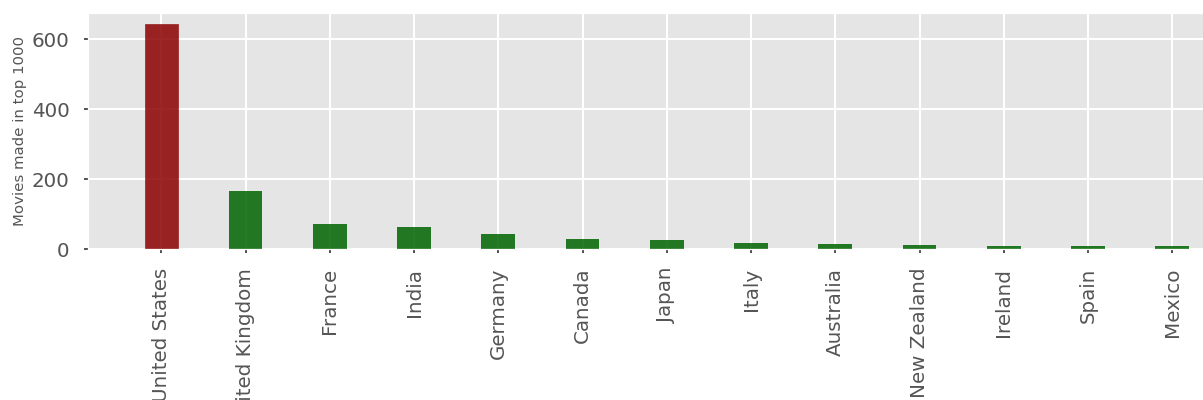

In [68]:
# group_country=mg_cd_df.groupby("country")
# group_country
# import matplotlib.style as style

ctry_count=mg_cd_df['country'].value_counts()
ctry_count_df=pd.DataFrame()
ctry_count_df['country count']=ctry_count
ctry_count_df=ctry_count_df.sort_values(by=['country count'],ascending = False)
ctry_count_df=ctry_count_df.reset_index()
ctry_count_df=ctry_count_df.rename(columns={'index':'country name'})
ctry_count_df=ctry_count_df.iloc[0:14]

x_axis=ctry_count_df['country name']
y_axis=ctry_count_df['country count']

# style.use('seaborn-poster') #sets the size of the charts
# style.use('ggplot')

plt.figure(figsize=(15,5))
bar = plt.bar(x_axis, y_axis, width=0.4, color='darkgreen', alpha=0.85, align="center")
bar[0].set_color('darkred')
plt.xlabel('Country Count', fontsize = 0.5, weight = 'bold')
plt.xticks(rotation=90)
plt.ylabel('Movies made in top 1000')
plt.tight_layout()
plt.show()
plt.savefig('coutryasdf1')

